In [201]:
library(limma)
library(GEOquery)
library(WGCNA)
library(dplyr)
library(readxl)
library(ggplot2)
library(dplyr)

In [177]:
gse <- getGEO("GSE106582", GSEMatrix = TRUE)

Found 1 file(s)

GSE106582_series_matrix.txt.gz

Using locally cached version: C:\Users\sebas\AppData\Local\Temp\RtmpSeqfxF/GSE106582_series_matrix.txt.gz

Using locally cached version of GPL10558 found here:
C:\Users\sebas\AppData\Local\Temp\RtmpSeqfxF/GPL10558.soft.gz 



In [178]:
expr <- exprs(gse[[1]])
pheno <- pData(gse[[1]])
fdata <- fData(gse[[1]])

In [179]:
write.csv(fdata, "fdata.csv", row.names = TRUE)

In [180]:
head(expr)

,GSM2843099,GSM2843100,GSM2843101,GSM2843102,GSM2843103,GSM2843104,GSM2843105,GSM2843106,GSM2843107,GSM2843108,⋯,GSM2843283,GSM2843284,GSM2843285,GSM2843286,GSM2843287,GSM2843288,GSM2843289,GSM2843290,GSM2843291,GSM2843292
ILMN_1343291,14.246636,14.306430,14.348227,14.233364,14.037613,14.306430,14.209482,14.233364,14.137572,14.348227,⋯,14.075304,14.209482,14.262302,14.137572,14.185752,14.306430,14.193309,14.348227,14.280982,14.246636
ILMN_1343295,12.738228,12.206211,12.700099,12.029697,11.334419,12.816596,12.552413,12.822330,11.944893,12.144393,⋯,11.679008,11.843007,12.866065,11.624542,11.237864,11.465310,11.443065,10.883836,11.750486,11.466828
ILMN_1651199,6.412016,6.633564,6.574890,6.450712,6.579476,6.439554,6.431542,6.346484,6.518873,6.325833,⋯,6.420452,6.674008,6.711727,6.579345,6.388410,6.399378,6.889240,6.394718,6.516751,6.187478
ILMN_1651209,6.710966,6.805210,6.622005,6.668240,6.736337,6.703673,6.452449,6.592954,6.502550,6.656889,⋯,6.612033,6.555067,6.474639,6.650995,6.624086,6.799771,6.573304,6.542434,6.601863,6.723900
ILMN_1651210,6.512163,6.588000,6.532367,6.576099,6.343878,6.589865,6.501190,6.571158,6.659456,6.476374,⋯,6.470704,6.419202,6.517013,6.552662,6.433940,6.433472,6.387217,6.443103,6.389635,6.528619
ILMN_1651221,6.594800,6.556280,6.739953,6.621620,6.474938,6.607903,6.558625,6.456971,6.564148,6.600523,⋯,6.696744,6.628282,6.537876,6.755657,6.498592,6.568854,6.553839,6.688859,6.424253,6.568933


In [181]:
head(pheno,2)

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,⋯,contact_city,contact_zip/postal_code,contact_country,supplementary_file,data_row_count,age:ch1,disease state:ch1,gender:ch1,patientid:ch1,tissue:ch1
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GSM2843099,400072_A,GSM2843099,Public on Dec 01 2018,Nov 06 2017,Dec 01 2018,RNA,1,Patient 400072; Tissue tumor,Homo sapiens,patientid: 400072,⋯,Freiburg,79110,Germany,NONE,47290,76,Colorectal cancer patient,M,400072,tumor
GSM2843100,400072_C,GSM2843100,Public on Dec 01 2018,Nov 06 2017,Dec 01 2018,RNA,1,Patient 400072; Tissue mucosa,Homo sapiens,patientid: 400072,⋯,Freiburg,79110,Germany,NONE,47290,76,Colorectal cancer patient,M,400072,mucosa


In [182]:
write.csv(pheno, "metadata.csv")

In [183]:
#head(fdata, 1)

In [184]:
colnames(fdata)

[1] "ID"                    "Species"               "Source"               
 [4] "Search_Key"            "Transcript"            "ILMN_Gene"            
 [7] "Source_Reference_ID"   "RefSeq_ID"             "Unigene_ID"           
[10] "Entrez_Gene_ID"        "GI"                    "Accession"            
[13] "Symbol"                "Protein_Product"       "Probe_Id"             
[16] "Array_Address_Id"      "Probe_Type"            "Probe_Start"          
[19] "SEQUENCE"              "Chromosome"            "Probe_Chr_Orientation"
[22] "Probe_Coordinates"     "Cytoband"              "Definition"           
[25] "Ontology_Component"    "Ontology_Process"      "Ontology_Function"    
[28] "Synonyms"              "Obsolete_Probe_Id"     "GB_ACC"

In [185]:
probe2gene_map <- fdata[, c("ID", "Symbol")]
colnames(probe2gene_map) <- c("ProbeID", "GeneSymbol")

# Remove any rows where the GeneSymbol is missing (NA) or empty
probe2gene_map <- probe2gene_map[!is.na(probe2gene_map$GeneSymbol) & probe2gene_map$GeneSymbol != "", ]
head(probe2gene_map)

,ProbeID,GeneSymbol
,<chr>,<chr>
ILMN_1343291,ILMN_1343291,EEF1A1
ILMN_1343295,ILMN_1343295,GAPDH
ILMN_1651199,ILMN_1651199,LOC643334
ILMN_1651209,ILMN_1651209,SLC35E2
ILMN_1651210,ILMN_1651210,DUSP22
ILMN_1651221,ILMN_1651221,LOC642820


In [186]:
table(pheno$'tissue:ch1')


mucosa  tumor 
   117     77 

In [187]:
group <- factor(pheno$'tissue:ch1')

In [188]:
expr_probe <- expr

In [189]:
## ----------------------------
## Assumptions:
## - deg_probe has columns: ProbeID (or rownames), Symbol, logFC, P.Value, adj.P.Val
## - expr_probe has rownames = ProbeIDs
## ----------------------------

## Helper: ensure numeric (in case something is char from merges/reads)
to_num <- function(x) suppressWarnings(as.numeric(x))

## If ProbeID is missing as a column, create it from rownames
if (!"ProbeID" %in% names(deg_probe)) {
  deg_probe$ProbeID <- rownames(deg_probe)
}

## (Optional) normalize Symbol field (handle "A /// B" -> "A")
if ("Symbol" %in% names(deg_probe)) {
  deg_probe$Symbol <- as.character(deg_probe$Symbol)
  deg_probe$Symbol[is.na(deg_probe$Symbol)] <- ""
  deg_probe$Symbol <- sub("\\s*///.*$", "", deg_probe$Symbol)  # keep first symbol
} else {
  deg_probe$Symbol <- ""
}

## Make sure numeric columns are numeric
deg_probe$logFC     <- to_num(deg_probe$logFC)
deg_probe$P.Value   <- to_num(deg_probe$P.Value)
deg_probe$adj.P.Val <- to_num(deg_probe$adj.P.Val)

## ----------------------------
## 1) Filter by significance
## ----------------------------
deg_probe_filt <- subset(deg_probe, !is.na(adj.P.Val) & !is.na(logFC) &
                                     adj.P.Val < 0.05 & abs(logFC) >= 0.5)

## Split annotated vs unannotated
is_annot   <- deg_probe_filt$Symbol != ""
deg_annot  <- deg_probe_filt[is_annot, ]
deg_unann  <- deg_probe_filt[!is_annot, ]

## ----------------------------
## 2) DEDUPLICATION (choose ONE of the two blocks)
## ----------------------------

## A) Keep the probe with the LOWEST adj.P.Val per Symbol (tie-breaker: lower P.Value, then larger |logFC|)
keep_bestFDR <- function(df) {
  o <- order(df$adj.P.Val,
             -abs(df$logFC),
             df$P.Value,
             df$ProbeID,
             na.last = TRUE)
  df_sorted <- df[o, , drop = FALSE]
  df_sorted[!duplicated(df_sorted$Symbol), , drop = FALSE]
}

## B) Keep the probe with the LARGEST |logFC| per Symbol (tie-breaker: lower adj.P.Val, then lower P.Value)
keep_largestAbsFC <- function(df) {
  o <- order(-abs(df$logFC), df$adj.P.Val, df$P.Value, df$ProbeID)
  df_sorted <- df[o, ]
  df_sorted[!duplicated(df_sorted$Symbol), ]
}

## >>> PICK YOUR CRITERION HERE <<<
## For your current need (largest |logFC|):
 deg_annot_unique <- keep_largestAbsFC(deg_annot)
## If instead you want lowest FDR, use:
## deg_annot_unique <- keep_bestFDR(deg_annot)

## ----------------------------
## 3) Recombine, rank globally, take TOP 2450
## ----------------------------
deg_combined <- rbind(deg_annot_unique, deg_unann)

## Global ranking by significance (FDR, then P, then |logFC|)
deg_combined <- deg_combined[order(deg_combined$adj.P.Val,
                                   deg_combined$P.Value,
                                   -abs(deg_combined$logFC),
                                   deg_combined$ProbeID), ]

deg_top2450 <- head(deg_combined, 2450)

## ----------------------------
## 4) Build expression matrix for WGCNA
## ----------------------------
## Use Symbol if present, else ProbeID; make unique for rownames
gene_labels <- ifelse(deg_top2450$Symbol == "" | is.na(deg_top2450$Symbol),
                      deg_top2450$ProbeID,
                      deg_top2450$Symbol)

## Ensure all requested probes are present in expr_probe
missing <- setdiff(deg_top2450$ProbeID, rownames(expr_probe))
if (length(missing) > 0) {
  warning(length(missing), " ProbeIDs not found in expr_probe; they will be dropped.")
}

keep <- deg_top2450$ProbeID %in% rownames(expr_probe)
expr_deg_top2450 <- expr_probe[deg_top2450$ProbeID[keep], , drop = FALSE]
rownames(expr_deg_top2450) <- make.unique(gene_labels[keep])

## ----------------------------
## 5) Save outputs
## ----------------------------
write.csv2(deg_probe,                 "DE_probe_all.csv", row.names = FALSE)
write.csv2(deg_probe_filt,            "DE_probe_filtered.csv", row.names = FALSE)
write.csv2(deg_annot_unique,          "DE_probe_annot_unique.csv", row.names = FALSE)
write.csv2(deg_combined,              "DE_probe_combined.csv", row.names = FALSE)
write.csv2(deg_top2450,               "DE_probe_top2450.csv", row.names = FALSE)
write.csv2(as.data.frame(expr_deg_top2450), "expression_DE_PROBES_top2450_for_WGCNA.csv")

In [190]:
# Quick summary
cat("Total DEGs (with symbols):", nrow(deg_probe_unique_or_probe), "\n")

Total DEGs (with symbols): 2817 


In [194]:
de_paper <- read_excel("DE_paper.xlsx")
head(de_paper)

ID,Gene.title,Gene.symbol,Gene.ID,GenBank.Accession,logFC,AveExpr,t,P.Value,adj.P.Val,B
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ILMN_1724686,claudin 1,CLDN1,9076,NM_021101,2.898190,8.206955,26.09215,2.142319e-65,1.013103e-60,138.2399
ILMN_1796801,ATP binding cassette subfamily A member 8,ABCA8,10351,NM_007168,-2.219053,8.525836,-25.13889,5.706935e-63,1.349405e-58,132.7277
ILMN_1735578,guanylate cyclase activator 2B,GUCA2B,2981,NM_007102,-3.382612,8.976680,-23.35400,2.699408e-58,4.255166e-54,122.0912
ILMN_1763749,guanylate cyclase activator 2A,GUCA2A,2980,NM_033553,-4.022642,10.673834,-22.80335,8.103526e-57,9.580394e-53,118.7267
ILMN_2210934,nuclear receptor subfamily 3 group C member 2,NR3C2,4306,NM_000901,-1.995027,9.671917,-22.26462,2.344417e-55,2.217350e-51,115.3975
ILMN_2126038,stathmin 2,STMN2,11075,NM_007029,-1.770089,8.340472,-22.20543,3.400732e-55,2.680343e-51,115.0294


In [199]:
deg_probe_all <- deg_probe

Matched probes: 2449



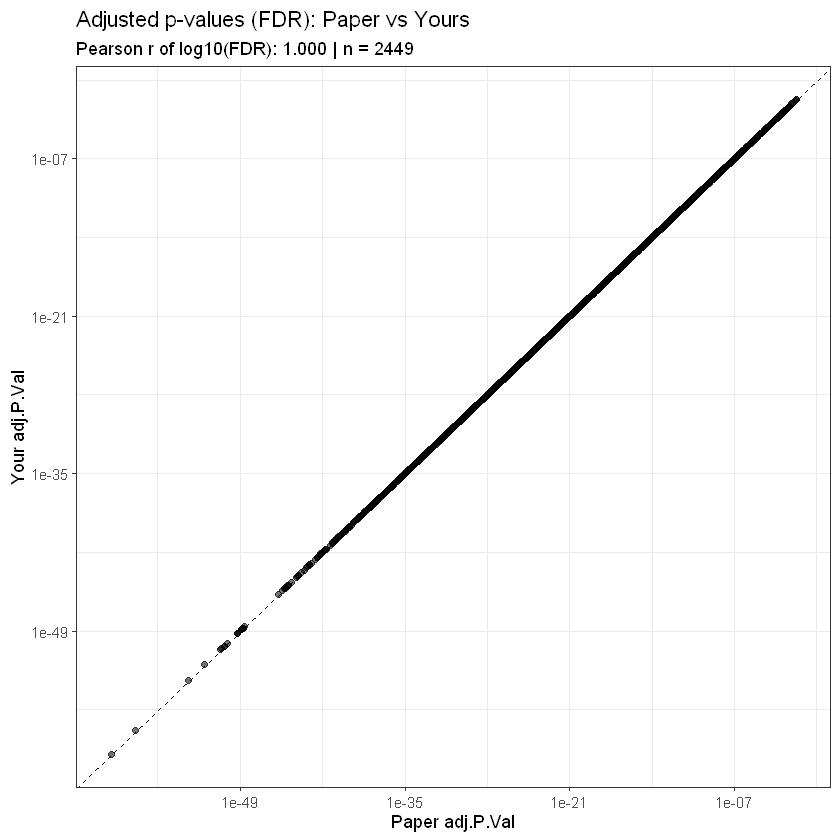

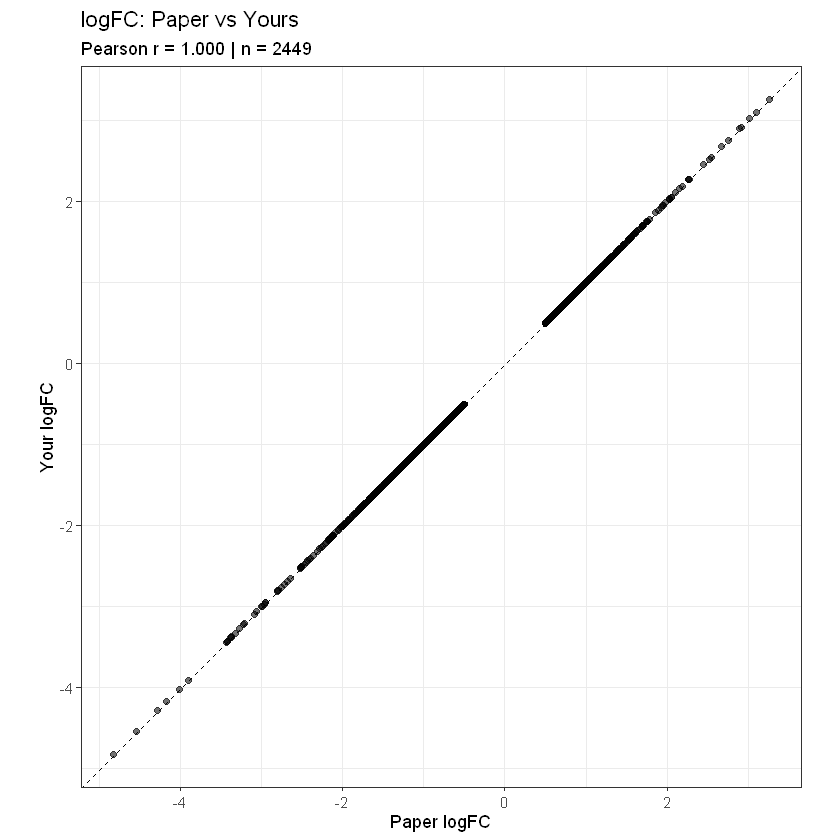

In [202]:
cmp <- de_paper %>%
  distinct(ID, .keep_all = TRUE) %>%
  transmute(ProbeID = as.character(ID),
            logFC_paper = as.numeric(logFC),
            adj.P.Val_paper = as.numeric(adj.P.Val)) %>%
  inner_join(
    deg_probe_all %>%
      transmute(ProbeID = as.character(ProbeID),
                logFC_mine = as.numeric(logFC),
                adj.P.Val_mine = as.numeric(adj.P.Val)),
    by = "ProbeID"
  )

message("Matched probes: ", nrow(cmp))

## 2) Correlations (optional, shown in subtitles)
cor_lfc <- suppressWarnings(cor(cmp$logFC_paper, cmp$logFC_mine, use = "complete.obs"))
cor_fdr <- suppressWarnings(cor(log10(pmax(cmp$adj.P.Val_paper, .Machine$double.xmin)),
                                log10(pmax(cmp$adj.P.Val_mine,  .Machine$double.xmin)),
                                use = "complete.obs"))

## 3) Plot: adjusted p-values (use log scales for visibility)
p_padj <- ggplot(cmp, aes(x = adj.P.Val_paper, y = adj.P.Val_mine)) +
  geom_point(alpha = 0.55, size = 1.6) +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed") +
  scale_x_log10() + scale_y_log10() +
  labs(
    title = "Adjusted p-values (FDR): Paper vs Yours",
    subtitle = paste0("Pearson r of log10(FDR): ", sprintf("%.3f", cor_fdr),
                      " | n = ", nrow(cmp)),
    x = "Paper adj.P.Val",
    y = "Your adj.P.Val"
  ) +
  theme_bw()

## 4) Plot: logFC
lim_lfc <- range(c(cmp$logFC_paper, cmp$logFC_mine), na.rm = TRUE)
p_lfc <- ggplot(cmp, aes(x = logFC_paper, y = logFC_mine)) +
  geom_point(alpha = 0.55, size = 1.6) +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed") +
  coord_equal(xlim = lim_lfc, ylim = lim_lfc, expand = TRUE) +
  labs(
    title = "logFC: Paper vs Yours",
    subtitle = paste0("Pearson r = ", sprintf("%.3f", cor_lfc),
                      " | n = ", nrow(cmp)),
    x = "Paper logFC",
    y = "Your logFC"
  ) +
  theme_bw()

## 5) Print and/or save
print(p_padj)
print(p_lfc)
ggsave("compare_adjPVal_paper_vs_mine.png", p_padj, width = 6, height = 5, dpi = 300)
ggsave("compare_logFC_paper_vs_mine.png",   p_lfc,  width = 6, height = 5, dpi = 300)

## 6) (Optional) export the aligned data used for the plots
write.csv(cmp, "paper_vs_mine_aligned_on_probeIDs.csv", row.names = FALSE)